###Checking GPU

In [1]:
!nvidia-smi

Mon Mar 11 17:08:39 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P8               9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

###Installing Packages

In [2]:
!pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 721.0/721.0 kB 4.8 MB/s eta 0:00:00


###Importing Packages

In [3]:
import ultralytics
import os
from IPython import display
display.clear_output()
ultralytics.checks()

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.4/78.2 GB disk)


In [4]:
from ultralytics import YOLO
from IPython.display import display, Image

In [5]:
#Dataset Location
road_crack = "/content/drive/MyDrive/Dataset/Road_Crack_Dataset/3"

##Setting Hyperparameters

In [6]:
EPOCHS = 30
IMGSIZE = 640
BATCH = 16

##Training Model

In [7]:
!yolo task=detect mode=train model=yolov8m.pt data={road_crack}/data.yaml epochs={EPOCHS} batch={BATCH} imgsz={IMGSIZE} lr0=0.001 lrf=0.005

100% 49.7M/49.7M [00:00<00:00, 167MB/s]
Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8m.pt, data=/content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/data.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False

##Visualizing Results

###Confusion Matrix

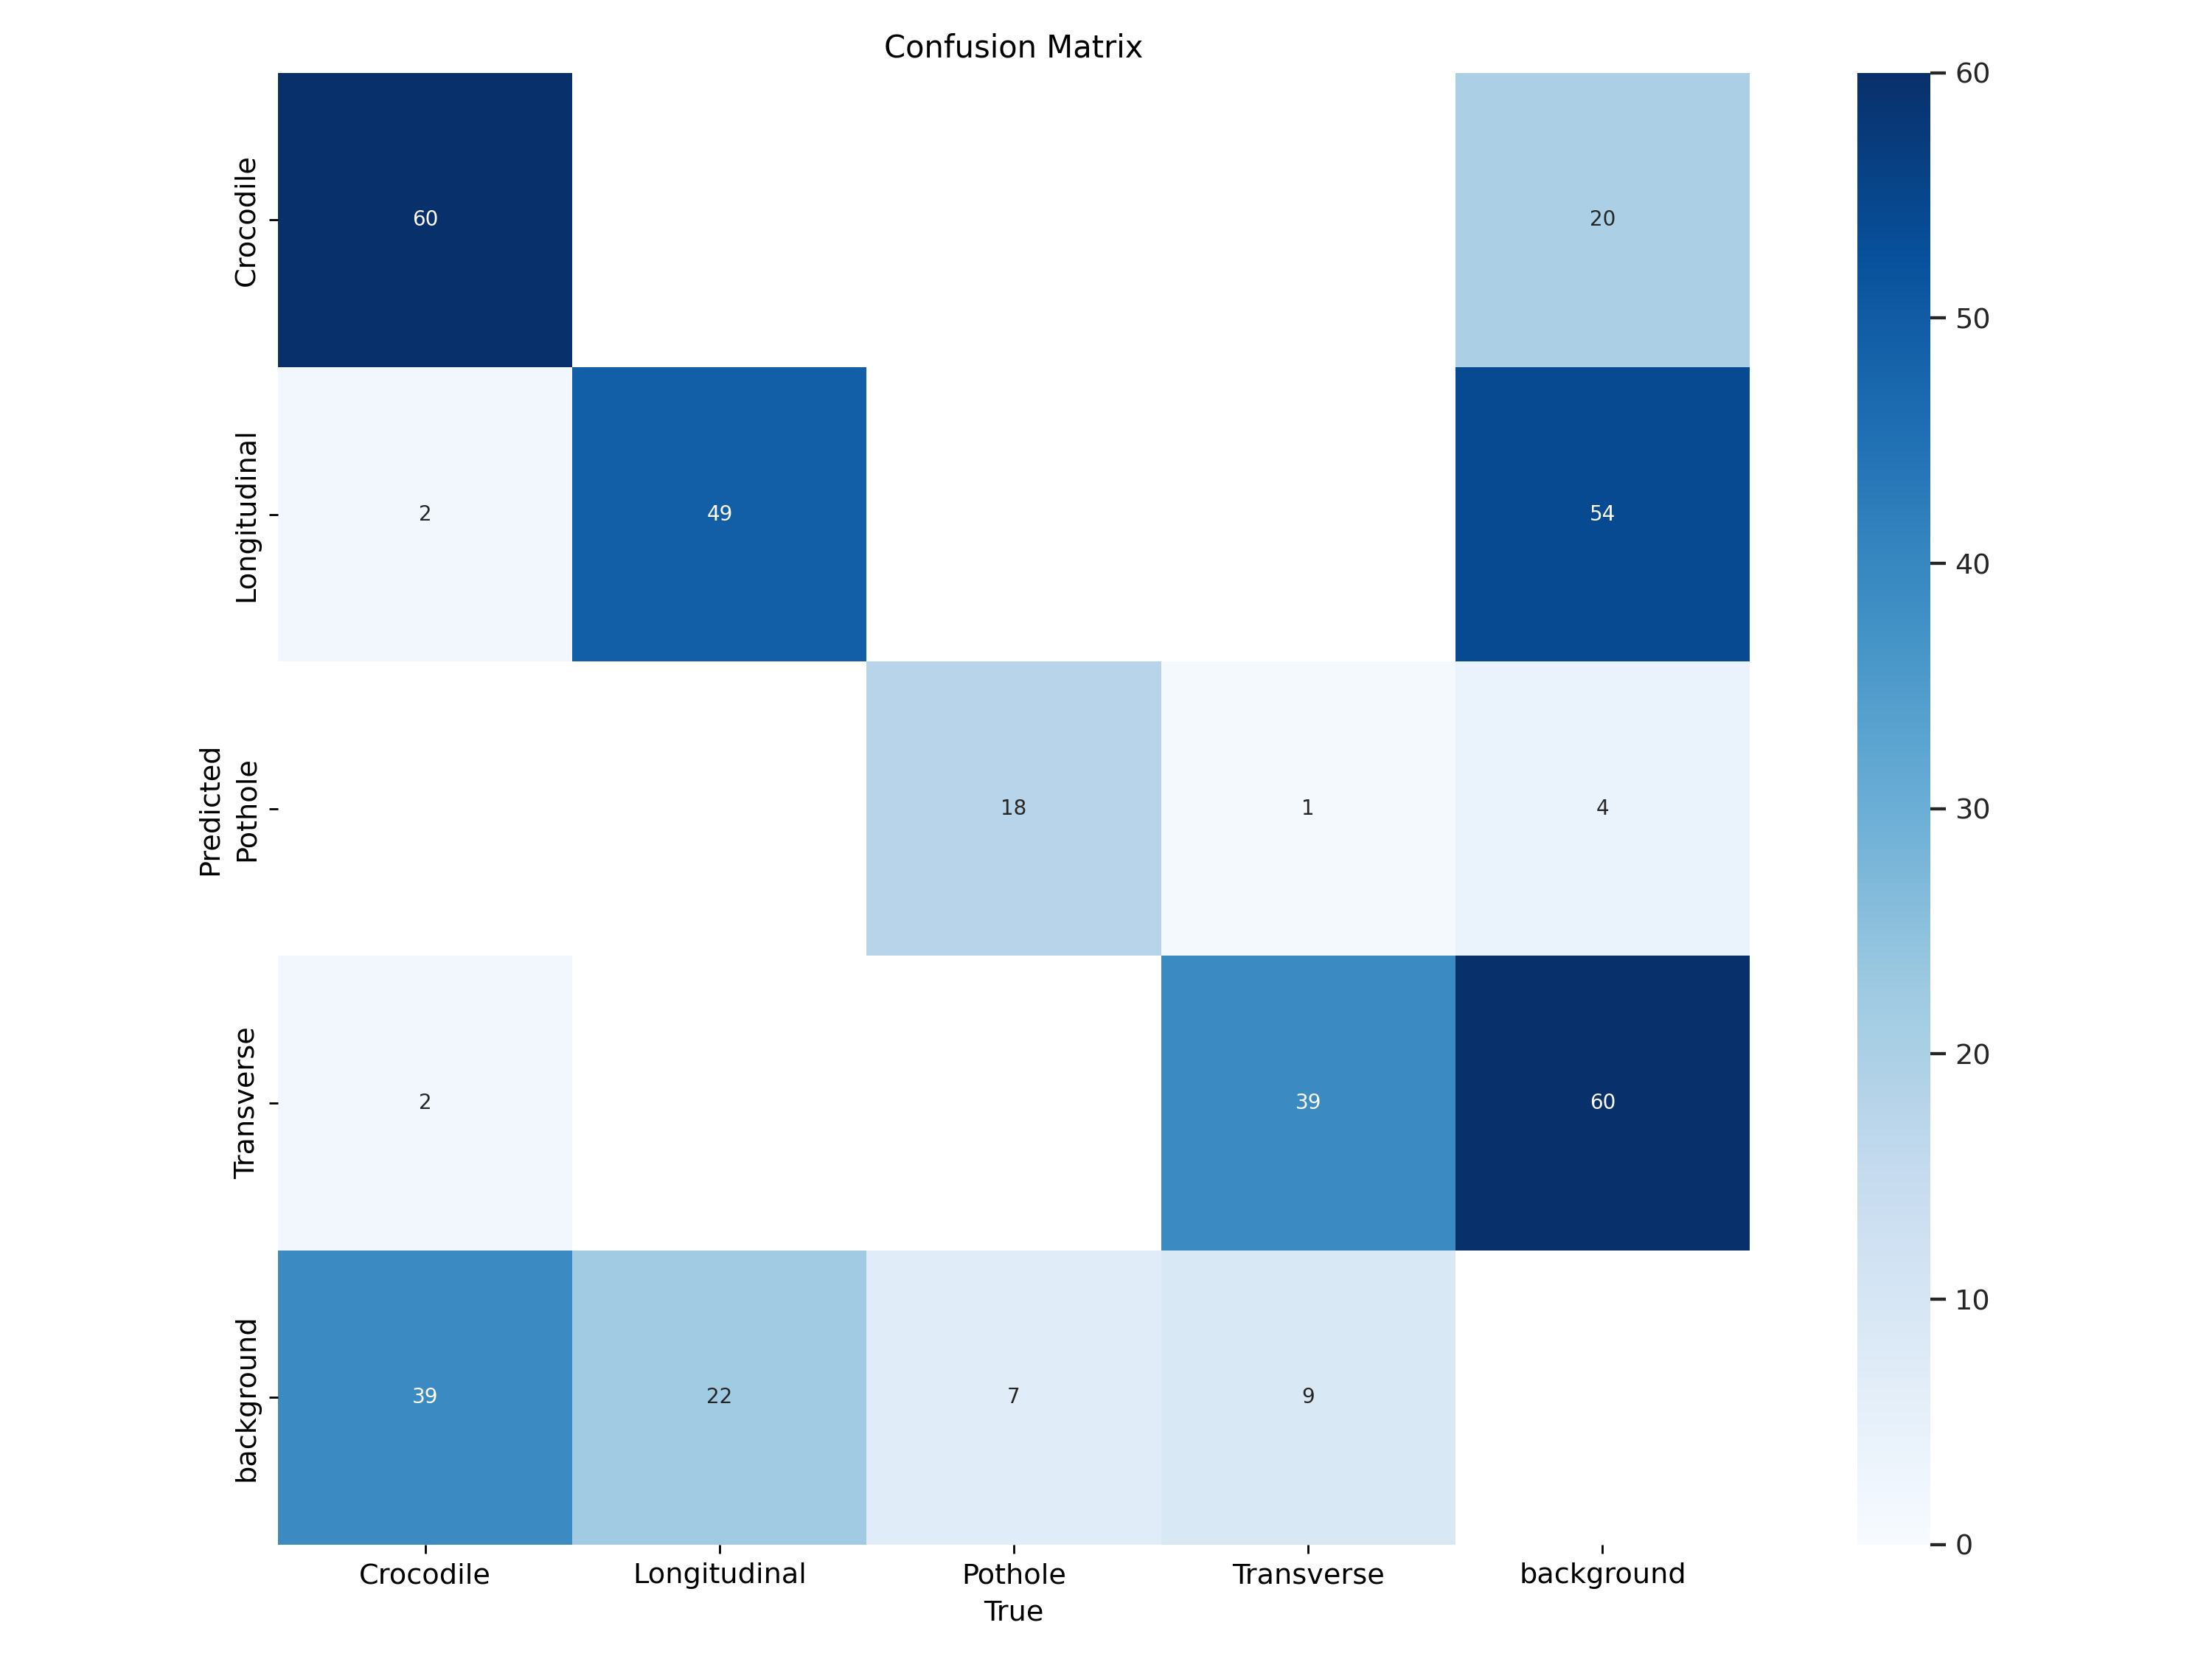

In [9]:
Image(filename=f'/content/runs/detect/train/confusion_matrix.png', width = 600)

###Scores

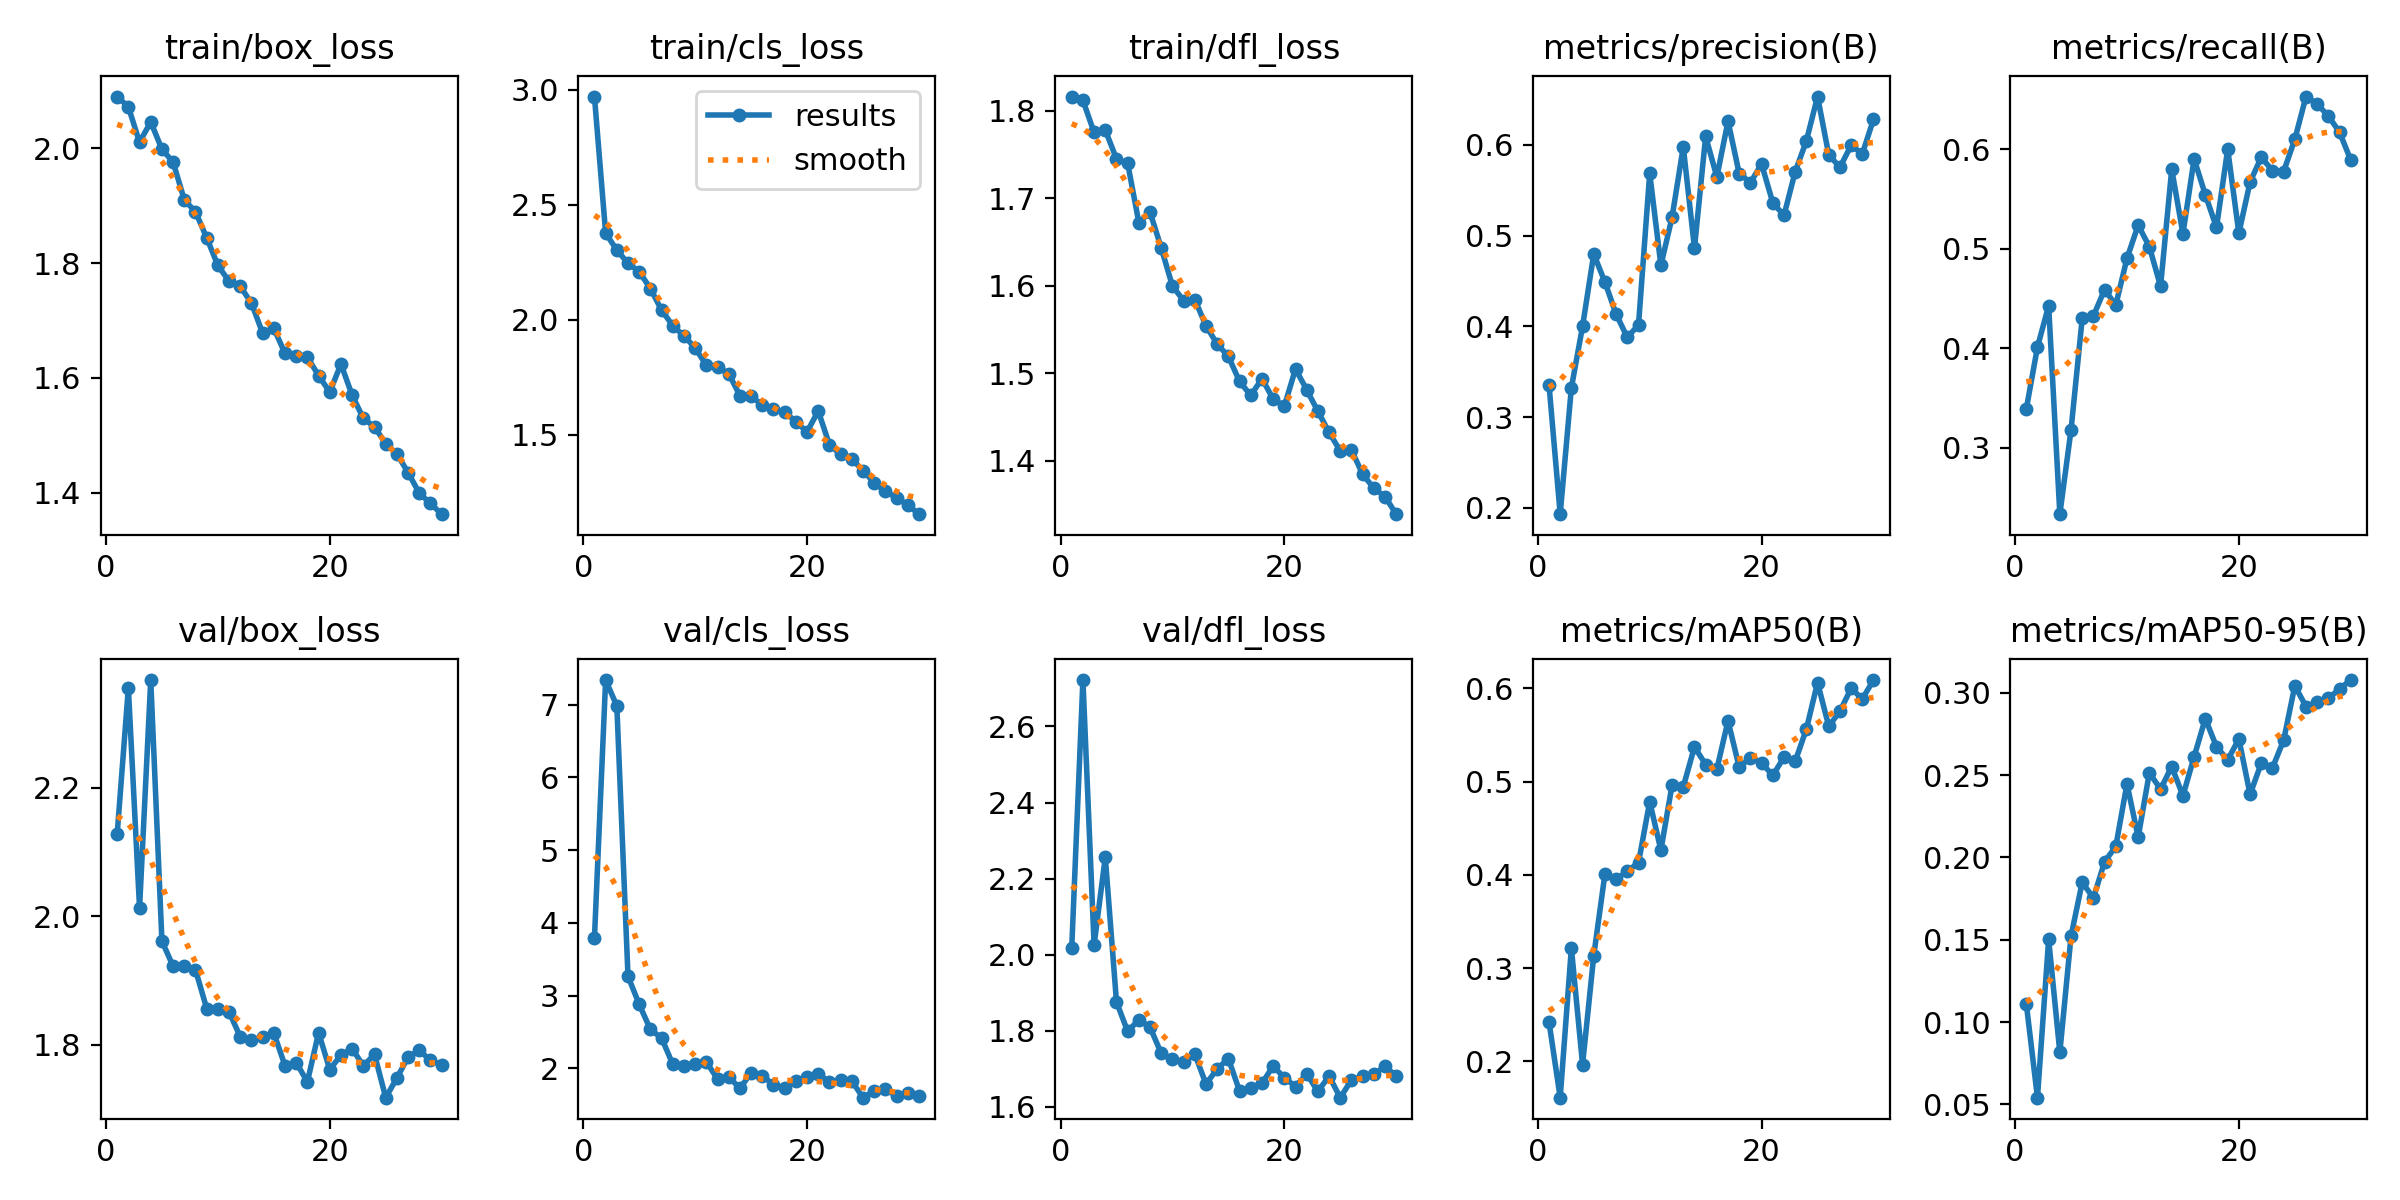

In [10]:
Image(filename=f'/content/runs/detect/train/results.png', width=600)

###F1 Score Curve

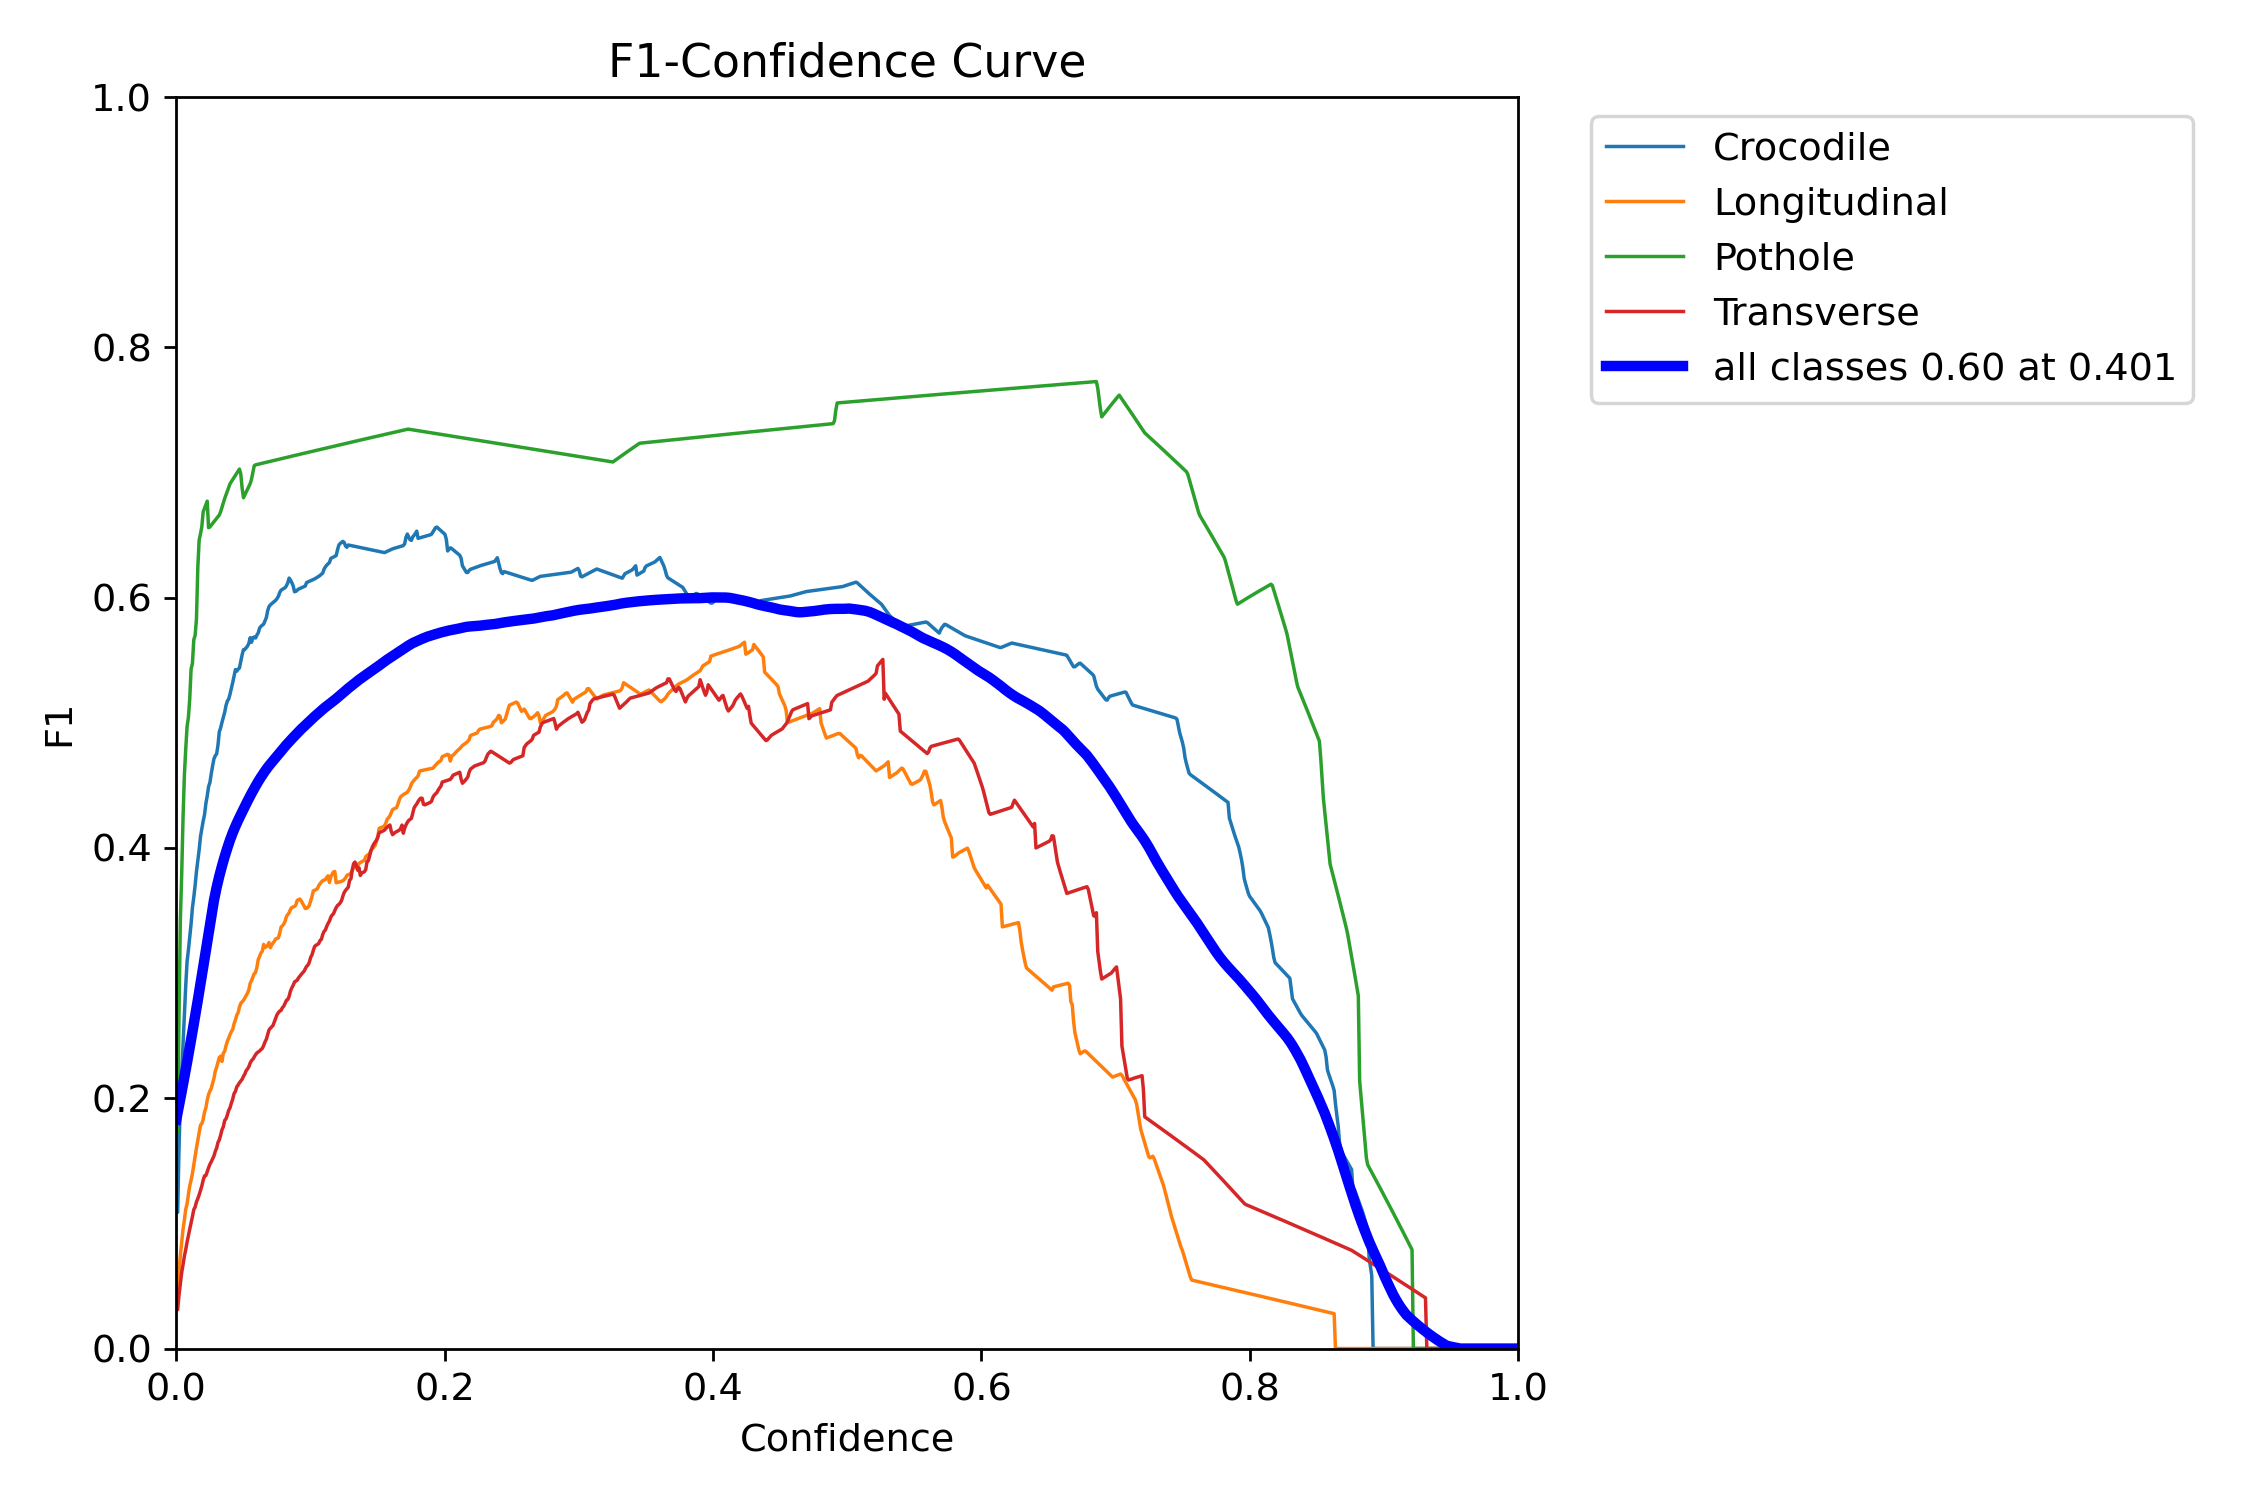

In [12]:
Image(filename='/content/runs/detect/train/F1_curve.png', width=600)

##Inference on Validation Set

In [13]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data={road_crack}/data.yaml save=True

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs
val: Scanning /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/valid/labels.cache... 82 images, 0 backgrounds, 0 corrupt: 100% 82/82 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 6/6 [00:06<00:00,  1.03s/it]
                   all         82        248      0.633      0.589       0.61      0.309
             Crocodile         82        103       0.77      0.495      0.658      0.341
          Longitudinal         82         71      0.529      0.549      0.484      0.171
               Pothole         82         25      0.783       0.68      0.752      0.515
            Transverse         82         49       0.45      0.633      0.546      0.211
Speed: 3.7ms preprocess, 14.3ms inference, 0.0ms loss, 10.8ms postprocess per image
Results saved to runs/dete

##Inference on Test Set

In [14]:
!yolo task=detect mode=predict model=/content/runs/detect/train/weights/best.pt conf=0.25 source={road_crack}/test/images save=True

Ultralytics YOLOv8.1.26 🚀 Python-3.10.12 torch-2.1.0+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 218 layers, 25842076 parameters, 0 gradients, 78.7 GFLOPs

image 1/45 /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/test/images/frame1077_jpg.rf.17ce881797dafa1fef47bd85e02eef31.jpg: 384x640 1 Crocodile, 1 Pothole, 1 Transverse, 72.2ms
image 2/45 /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/test/images/frame1078_jpg.rf.14324b847cbfd1be0e888bb486f60fbf.jpg: 384x640 1 Crocodile, 1 Pothole, 25.1ms
image 3/45 /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/test/images/frame1195_jpg.rf.e976b376074462477335bdd7afdb6ab5.jpg: 384x640 2 Crocodiles, 2 Transverses, 25.1ms
image 4/45 /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/test/images/frame1302_jpg.rf.e5574f3382b92baf29d9b43bbcc705ed.jpg: 384x640 (no detections), 25.2ms
image 5/45 /content/drive/MyDrive/Dataset/Road_Crack_Dataset/3/test/images/frame1493_jpg.rf.9c5fd489df2b754b507cb866fc2618ef.jpg: 384x640 2 Cro

###Checking Results

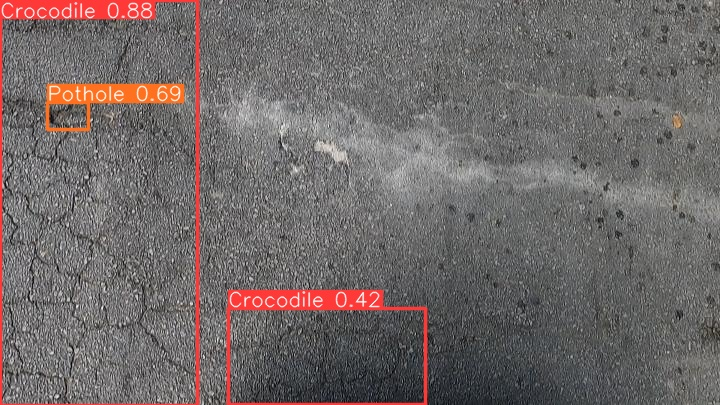

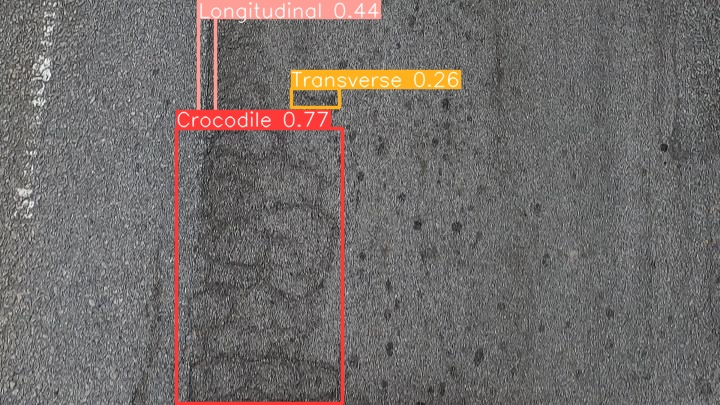

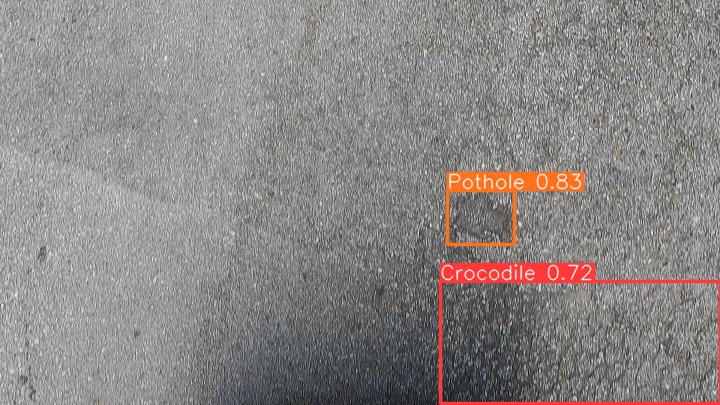

In [15]:
import glob

for image_path in glob.glob(f'/content/runs/detect/predict/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

###Saving the Model Weights

In [17]:
from google.colab import files

#Downloading to Local Drive
files.download('/content/runs/detect/train/weights/best.pt')

#Copying to Google Drive
%cp '/content/runs/detect/train/weights/best.pt' '/content/drive/MyDrive/Models'

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>